<a href="https://colab.research.google.com/github/SinghPrach/Data_Engineering/blob/main/WeatherDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [3]:
#Reading the csv file
df_raw=pd.read_csv('/content/Weather Data.csv')

Getting all the required information for the dataset

In [5]:
print(f'Number of rows: {df_raw.shape[0]}')
print(f'Number of columns: {df_raw.shape[1]}')
print(f'Data types: {set(df_raw.dtypes.values)}')
print(f'Missing values: {df_raw.isnull().values.any()}')
print(f"Duplicates: {df_raw.drop(columns='Date/Time').duplicated().sum()}")

Number of rows: 8784
Number of columns: 8
Data types: {dtype('O'), dtype('int64'), dtype('float64')}
Missing values: False
Duplicates: 0


In [9]:
display(df_raw)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [10]:
df_raw.dtypes

,0
Date/Time,object
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


Renaming the columns by removing special characters

In [14]:
df_raw = df_raw.rename(columns={
    'Date/Time': 'DateAndTime',
    'Rel Hum_%': 'RelHum_Percent',
    'Wind Speed_km/h': 'WindSpd_km_h'
})

In [15]:
df_raw.head()

,DateAndTime,Temp_C,Dew Point Temp_C,RelHum_Percent,WindSpd_km_h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [22]:
def get_before_first_space(s):
    return s.partition(' ')[0]
def get_after_first_space(s):
    index = s.find(' ')
    if index == -1:
        return ''  # Return an empty string if no space is found
    return s[index + 1:]

In [23]:
df_raw['Date'] = df_raw['DateAndTime'].apply(get_before_first_space)
df_raw['Time'] = df_raw['DateAndTime'].apply(get_after_first_space)

In [24]:
df_raw.head()

,DateAndTime,Temp_C,Dew Point Temp_C,RelHum_Percent,WindSpd_km_h,Visibility_km,Press_kPa,Weather,Date,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1/1/2012,2:00
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1/1/2012,3:00
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1/1/2012,4:00


In [25]:
df_raw = df_raw.drop('DateAndTime',axis=1)

In [26]:
df_raw.head()

,Temp_C,Dew Point Temp_C,RelHum_Percent,WindSpd_km_h,Visibility_km,Press_kPa,Weather,Date,Time
0,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00
1,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1/1/2012,2:00
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1/1/2012,3:00
4,-1.5,-3.3,88,7,4.8,101.23,Fog,1/1/2012,4:00


In [34]:
unique_weather = df_raw['Weather'].unique()
df_unique_weather = pd.DataFrame(unique_weather, columns=['UniqueWeather'])
unique_Press_kPa = df_raw['Press_kPa'].unique()
df_unique_Press_kPa = pd.DataFrame(unique_weather, columns=['unique_Press_kPa'])
unique_WindSpd_km_h = df_raw['WindSpd_km_h'].unique()
df_unique_WindSpd_km_h = pd.DataFrame(unique_weather, columns=['UniqueWindSpd_km_h'])

In [35]:
display(df_unique_weather)
display(df_unique_Press_kPa)
display(df_unique_WindSpd_km_h)

,UniqueWeather
0,Fog
1,"Freezing Drizzle,Fog"
2,Mostly Cloudy
3,Cloudy
4,Rain
5,Rain Showers
6,Mainly Clear
7,Snow Showers
8,Snow
9,Clear


,unique_Press_kPa
0,Fog
1,"Freezing Drizzle,Fog"
2,Mostly Cloudy
3,Cloudy
4,Rain
5,Rain Showers
6,Mainly Clear
7,Snow Showers
8,Snow
9,Clear


,UniqueWindSpd_km_h
0,Fog
1,"Freezing Drizzle,Fog"
2,Mostly Cloudy
3,Cloudy
4,Rain
5,Rain Showers
6,Mainly Clear
7,Snow Showers
8,Snow
9,Clear


We will get combination of unique values of weather condition, pressure, and wind speed.

In [39]:
df_raw['Weather'].value_counts()
df_raw['Press_kPa'].value_counts()
df_raw['WindSpd_km_h'].value_counts()

,count
WindSpd_km_h,
9,830
11,791
13,735
15,719
7,677
17,666
19,616
6,609
20,496


In [41]:
unique_weather_pressure_windspeed = df_raw.groupby(['Weather', 'Press_kPa','WindSpd_km_h']).size().reset_index().drop(0, axis=1)
display(unique_weather_pressure_windspeed)

,Weather,Press_kPa,WindSpd_km_h
0,Clear,99.52,26
1,Clear,99.63,20
2,Clear,99.66,17
3,Clear,99.67,17
4,Clear,99.68,15
...,...,...,...
7060,"Thunderstorms,Rain Showers",101.06,22
7061,"Thunderstorms,Rain Showers,Fog",99.71,7
7062,"Thunderstorms,Rain Showers,Fog",99.84,17
7063,"Thunderstorms,Rain Showers,Fog",100.64,35


Dividing the records into morning, afternoon, evening, night

In [42]:
df_raw['PhaseOfDay'] = df_raw['Time'].apply(lambda x: 'Morning' if '4:00' <= x <= '12:`00' else 'Afternoon' if '12:00' <= x <= '18:00' else 'Evening' if '18:00' <= x <= '20:00' else 'Night')

In [43]:
df_raw.head()

,Temp_C,Dew Point Temp_C,RelHum_Percent,WindSpd_km_h,Visibility_km,Press_kPa,Weather,Date,Time,PhaseOfDay
0,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00,Night
1,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00,Evening
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1/1/2012,2:00,Night
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1/1/2012,3:00,Night
4,-1.5,-3.3,88,7,4.8,101.23,Fog,1/1/2012,4:00,Night


In [44]:
df_raw.max()

,0
Temp_C,33.0
Dew Point Temp_C,24.4
RelHum_Percent,100
WindSpd_km_h,83
Visibility_km,48.3
Press_kPa,103.65
Weather,"Thunderstorms,Rain,Fog"
Date,9/9/2012
Time,9:00
PhaseOfDay,Night


In [45]:
df_raw.min()

,0
Temp_C,-23.3
Dew Point Temp_C,-28.5
RelHum_Percent,18
WindSpd_km_h,0
Visibility_km,0.2
Press_kPa,97.52
Weather,Clear
Date,1/1/2012
Time,0:00
PhaseOfDay,Afternoon


In [46]:
df_sum =df_raw.groupby(["Weather"])[["Visibility_km","Press_kPa","RelHum_Percent","WindSpd_km_h"]].sum().reset_index()
display(df_sum)

,Weather,Visibility_km,Press_kPa,RelHum_Percent,WindSpd_km_h
0,Clear,39983.2,134704.95,85524,13999
1,Cloudy,46009.3,174374.97,120256,27868
2,Drizzle,735.2,4117.85,3618,660
3,"Drizzle,Fog",420.6,8062.93,7462,949
4,"Drizzle,Ice Pellets,Fog",4.0,100.79,92,20
5,"Drizzle,Snow",21.0,201.78,187,28
6,"Drizzle,Snow,Fog",82.7,1489.22,1438,233
7,Fog,937.2,15177.61,13843,1192
8,Freezing Drizzle,64.4,701.42,585,116
9,"Freezing Drizzle,Fog",31.6,602.65,531,102


In [48]:
df_raw.loc[df_raw['Visibility_km'].idxmin()]

,1826
Temp_C,2.7
Dew Point Temp_C,2.5
RelHum_Percent,99
WindSpd_km_h,4
Visibility_km,0.2
Press_kPa,102.09
Weather,Fog
Date,3/17/2012
Time,2:00
PhaseOfDay,Night


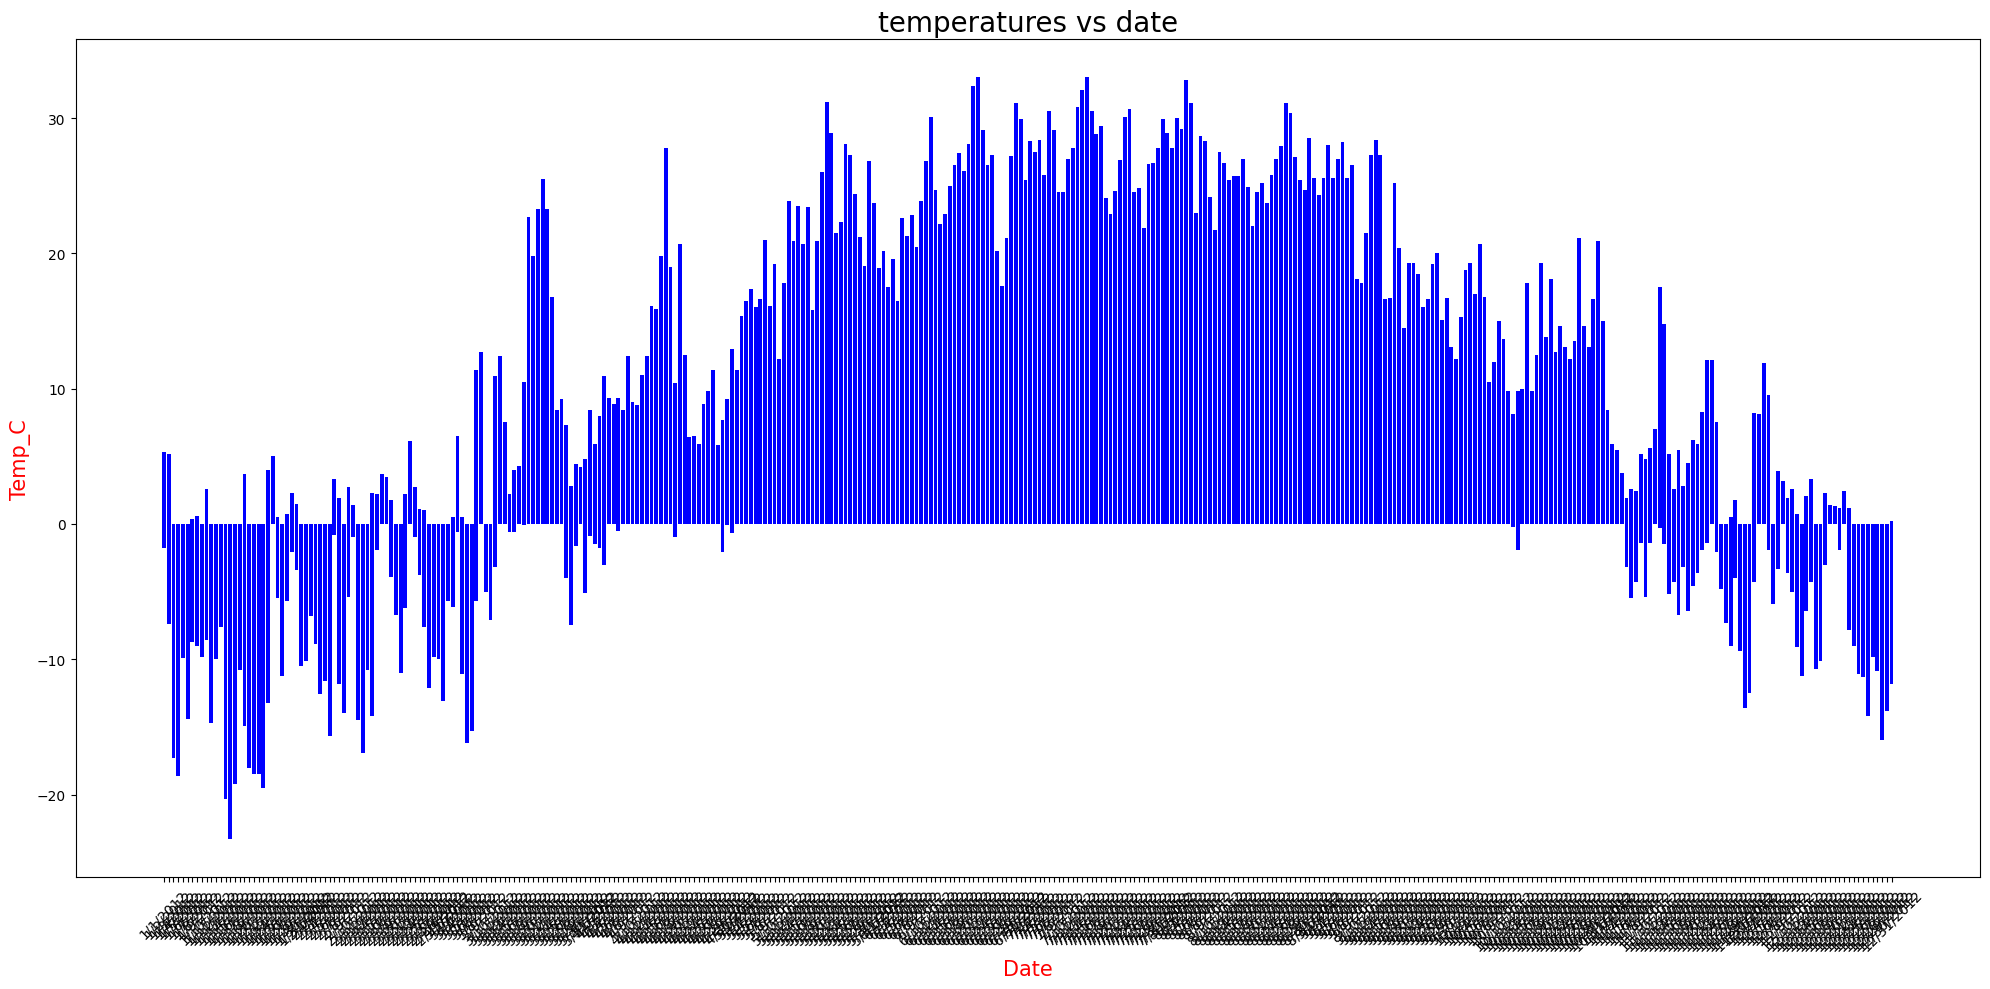

In [57]:
plt.figure(figsize=(20, 10))
plt.bar(df_raw["Date"], df_raw["Temp_C"], color='blue')
plt.xlabel('Date', fontsize=15, color='r')
plt.ylabel('Temp_C', fontsize=15, color='r')
plt.title('temperatures vs date', fontsize=20, color='k')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

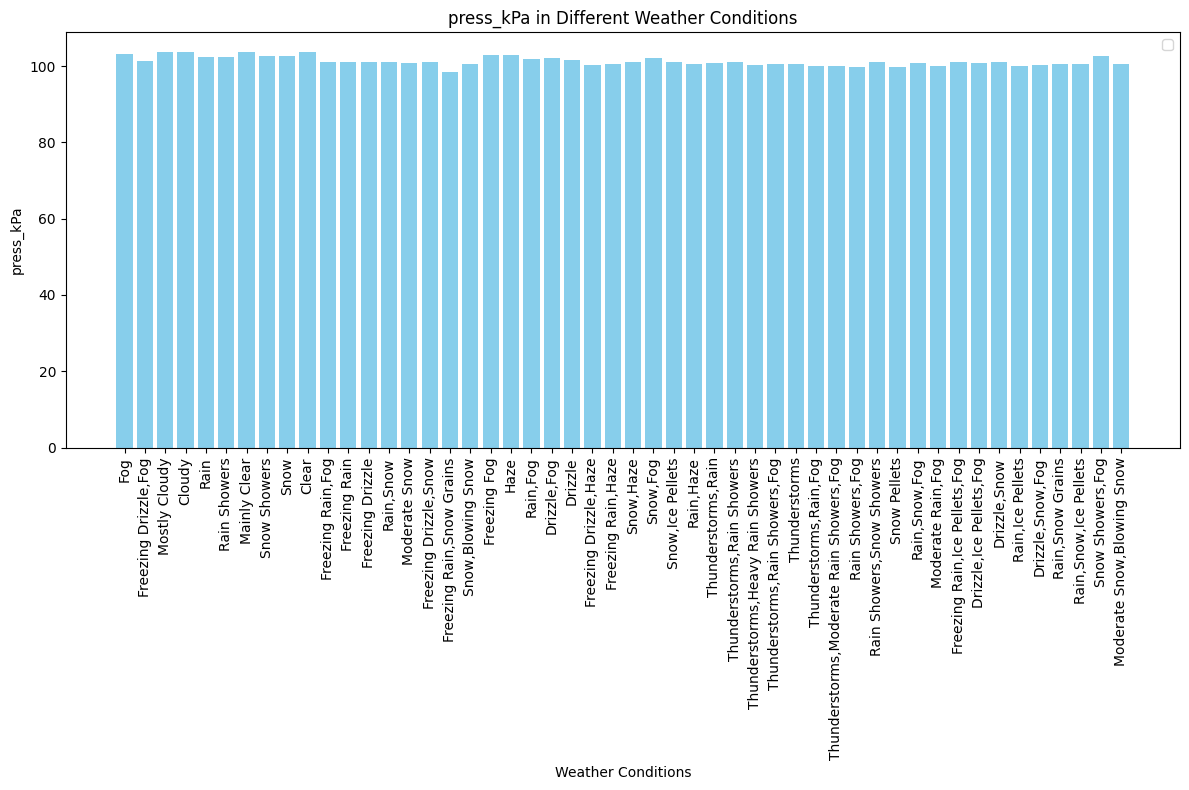

In [56]:
plt.figure(figsize=(12, 8))
plt.bar(df_raw["Weather"], df_raw["Press_kPa"], color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('press_kPa')
plt.title('press_kPa in Different Weather Conditions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()